<a href="https://colab.research.google.com/github/Naga-Aditya-Anand/Machine-Learning-Projects/blob/main/Handwritten-Digit-Recogntion-CNN/HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
import cv2

In [2]:
mnist = tf.keras.datasets.mnist
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

X_train , X_test = X_train/255.0 , X_test/255.0

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [5]:
model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9123 - loss: 0.2920 - val_accuracy: 0.9832 - val_loss: 0.0542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9860 - loss: 0.0424 - val_accuracy: 0.9864 - val_loss: 0.0426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9912 - val_loss: 0.0280


In [6]:
test_loss,test_acc = model.evaluate(X_test,Y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9890 - loss: 0.0338
0.028021298348903656 0.9911999702453613


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


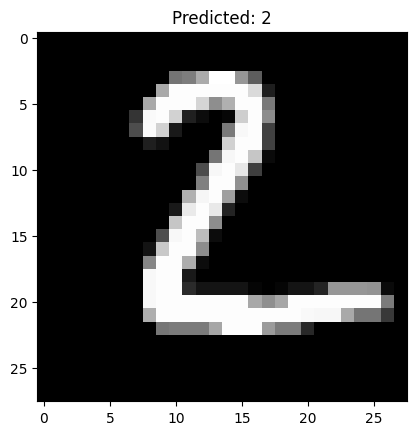

In [7]:
predictions = model.predict(X_test)
pred_label = np.argmax(predictions[1])

plt.imshow(X_test[1].squeeze(), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()

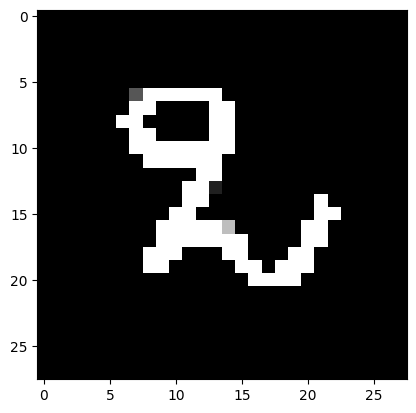

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Number: 2


In [108]:
image = cv2.imread('2.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.bitwise_not(gray)
_, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
digit = cv2.resize(thresh, (28, 28))
digit = digit / 255.0
digit = digit.reshape(1, 28, 28, 1)

plt.imshow(digit.squeeze(),cmap="gray")
plt.show()

pred = model.predict(digit)
predi_label = np.argmax(pred)
print("Predicted Number: " + str(predi_label))

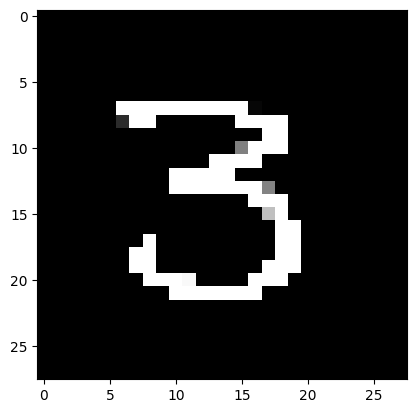

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Number: 3


In [109]:
image = cv2.imread('3.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.bitwise_not(gray)
_, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
digit = cv2.resize(thresh, (28, 28))
digit = digit / 255.0
digit = digit.reshape(1, 28, 28, 1)

plt.imshow(digit.squeeze(),cmap="gray")
plt.show()

pred = model.predict(digit)
predi_label = np.argmax(pred)
print("Predicted Number: " + str(predi_label))